In [121]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# Load Dataset
df = pd.read_csv('Titanic_Dataset.csv')

# Display basic information
print("=== DATASET SHAPE ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"\nColumn names: {list(df.columns)}")

=== DATASET SHAPE ===
Rows: 891, Columns: 12

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [123]:
# Data types and missing values analysis

print("=== DATA TYPES ===")
print(df.dtypes)
print("\n" + "="*50)

print("\n=== MISSING VALUES ANALYSIS ===")
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percentage': missing_percentage.round(2)
})

print(missing_summary[missing_summary['Missing_Count'] > 0])

=== DATA TYPES ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


=== MISSING VALUES ANALYSIS ===
          Missing_Count  Missing_Percentage
Age                 177               19.87
Cabin               687               77.10
Embarked              2                0.22


In [124]:
# Basic statistics
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [125]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
# Handle missing values 
print("=== EMBARKED COLUMN ANALYSIS ===")
print("\nValue counts:")
print(df['Embarked'].value_counts())
print(f"\nMissing values: {df['Embarked'].isnull().sum()}")

# Fill missing Embarked with mode (most frequent value)
embarked_mode = df['Embarked'].mode()[0]
print(f"\nMode (most frequent): {embarked_mode}")

df['Embarked'].fillna(embarked_mode, inplace=True)

print(f"\nAfter filling - Missing values: {df['Embarked'].isnull().sum()}")

=== EMBARKED COLUMN ANALYSIS ===

Value counts:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Missing values: 2

Mode (most frequent): S

After filling - Missing values: 0


C:\Users\Rajat\AppData\Local\Temp\ipykernel_2488\2993232630.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(embarked_mode, inplace=True)


In [127]:
# Handle Cabin column (77% missing )
print("=== CABIN COLUMN ANALYSIS ===")
print(f"Missing values: {df['Cabin'].isnull().sum()}")
print(f"Missing percentage: {(df['Cabin'].isnull().sum()/len(df)*100):.2f}%")

# Since 77% of Cabin data is missing, create a binary feature instead
df['Has_Cabin'] = df['Cabin'].notna().astype(int)

print(f"\nCreated 'Has_Cabin' feature:")
print(df['Has_Cabin'].value_counts())

# Drop the original Cabin column
df.drop('Cabin', axis=1, inplace=True)

print(f"\nDropped original Cabin column")
print(f"New dataset shape: {df.shape}")

=== CABIN COLUMN ANALYSIS ===
Missing values: 687
Missing percentage: 77.10%

Created 'Has_Cabin' feature:
Has_Cabin
0    687
1    204
Name: count, dtype: int64

Dropped original Cabin column
New dataset shape: (891, 12)


In [128]:
# Handle Age missing values with median imputation by Pclass
print("=== AGE COLUMN ANALYSIS ===")
print(f"Missing values: {df['Age'].isnull().sum()}")

# Check Age distribution by Pclass (passenger class)
print("\nAge statistics by Passenger Class:")
print(df.groupby('Pclass')['Age'].agg(['count', 'mean', 'median']).round(2))

# Impute missing Age values with median age of respective Pclass
for pclass in df['Pclass'].unique():
    median_age = df[df['Pclass'] == pclass]['Age'].median()
    df.loc[(df['Age'].isnull()) & (df['Pclass'] == pclass), 'Age'] = median_age
    print(f"Filled Pclass {pclass} missing ages with median: {median_age:.1f}")

print(f"\nAfter imputation - Missing values: {df['Age'].isnull().sum()}")

=== AGE COLUMN ANALYSIS ===
Missing values: 177

Age statistics by Passenger Class:
        count   mean  median
Pclass                      
1         186  38.23    37.0
2         173  29.88    29.0
3         355  25.14    24.0
Filled Pclass 3 missing ages with median: 24.0
Filled Pclass 1 missing ages with median: 37.0
Filled Pclass 2 missing ages with median: 29.0

After imputation - Missing values: 0


In [129]:
# Verify no missing values and prepare for encoding

missing_final = df.isnull().sum()
print("Missing values per column:")
print(missing_final)
print(f"\nTotal missing values in dataset: {missing_final.sum()}")

print("\n=== CATEGORICAL COLUMNS FOR ENCODING ===")
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_columns}")

# Display unique values in each categorical column
for col in categorical_columns:
    print(f"\n{col}: {df[col].unique()}")

Missing values per column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

Total missing values in dataset: 0

=== CATEGORICAL COLUMNS FOR ENCODING ===
Categorical columns: ['Name', 'Sex', 'Ticket', 'Embarked']

Name: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 '

In [134]:
# Encode categorical variables - Sex (Binary encoding)
print("=== ENCODING SEX COLUMN ===")
print("\nOriginal Sex values:")
print(df['Sex'].value_counts())

# Binary encoding for Sex: male=1, female=0
df['Sex_encoded'] = df['Sex'].map({'male': 1, 'female': 0})

print("\nAfter encoding:")
print(df['Sex_encoded'].value_counts())

# Verify the encoding worked
print("\nVerification - Sex vs Sex_encoded:")
print(df[['Sex', 'Sex_encoded']].head(10))

=== ENCODING SEX COLUMN ===

Original Sex values:
Sex
male      577
female    314
Name: count, dtype: int64

After encoding:
Sex_encoded
1    577
0    314
Name: count, dtype: int64

Verification - Sex vs Sex_encoded:
      Sex  Sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1
5    male            1
6    male            1
7    male            1
8  female            0
9  female            0


In [132]:
# Check current dataset status
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [135]:
# One-hot encode Embarked column
print("=== ENCODING EMBARKED COLUMN ===")
print("\nOriginal Embarked values:")
print(df['Embarked'].value_counts())

# One-hot encoding for Embarked
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')
print(f"\nCreated columns: {list(embarked_encoded.columns)}")

# Add the encoded columns to dataframe
df = pd.concat([df, embarked_encoded], axis=1)

print("\nNew Embarked encoded columns:")
print(embarked_encoded.head())

print(f"\nDataset shape after encoding: {df.shape}")

=== ENCODING EMBARKED COLUMN ===

Original Embarked values:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Created columns: ['Embarked_C', 'Embarked_Q', 'Embarked_S']

New Embarked encoded columns:
   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True

Dataset shape after encoding: (891, 16)


In [136]:
# Convert boolean columns to integers and clean up
print("=== CONVERTING ENCODED COLUMNS TO INTEGERS ===")

# Convert boolean columns to integers (0/1)
embarked_cols = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
for col in embarked_cols:
    df[col] = df[col].astype(int)

print("After converting to integers:")
print(df[embarked_cols].head())

# Drop original categorical columns we've encoded
columns_to_drop = ['Sex', 'Embarked', 'Name', 'Ticket']
df.drop(columns_to_drop, axis=1, inplace=True)

print(f"\nDropped columns: {columns_to_drop}")
print(f"Final dataset shape: {df.shape}")
print(f"\nRemaining columns: {list(df.columns)}")

=== CONVERTING ENCODED COLUMNS TO INTEGERS ===
After converting to integers:
   Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1

Dropped columns: ['Sex', 'Embarked', 'Name', 'Ticket']
Final dataset shape: (891, 12)

Remaining columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [138]:
# Dataset cleanup
print("=== DATASET CLEANUP ===")

# Drop non-essential columns for ML
columns_to_drop = ['PassengerId']  # Just an identifier, not useful for prediction
df.drop(columns_to_drop, axis=1, inplace=True)
print(f"Dropped: {columns_to_drop}")

print(f"\nFinal dataset shape: {df.shape}")
print(f"Final columns: {list(df.columns)}")

print(f"\nClean dataset ready for normalization:")
print(df.head())

=== DATASET CLEANUP ===
Dropped: ['PassengerId']

Final dataset shape: (891, 11)
Final columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

Clean dataset ready for normalization:
   Survived  Pclass   Age  SibSp  Parch     Fare  Has_Cabin  Sex_encoded  \
0         0       3  22.0      1      0   7.2500          0            1   
1         1       1  38.0      1      0  71.2833          1            0   
2         1       3  26.0      0      0   7.9250          0            0   
3         1       1  35.0      1      0  53.1000          1            0   
4         0       3  35.0      0      0   8.0500          0            1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1  


In [139]:
# Identify numerical features for normalization
from sklearn.preprocessing import StandardScaler

print("=== IDENTIFYING NUMERICAL FEATURES ===")

# Separate target variable and features
target = 'Survived'
X = df.drop(target, axis=1)
y = df[target]

print(f"Target variable: {target}")
print(f"Features shape: {X.shape}")

# Identify numerical columns (excluding binary encoded ones)
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
binary_cols = ['Pclass', 'Has_Cabin', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

print(f"\nNumerical columns to normalize: {numerical_cols}")
print(f"Binary/categorical columns (keep as-is): {binary_cols}")

print(f"\nBefore normalization - Numerical features statistics:")
print(X[numerical_cols].describe())

=== IDENTIFYING NUMERICAL FEATURES ===
Target variable: Survived
Features shape: (891, 10)

Numerical columns to normalize: ['Age', 'SibSp', 'Parch', 'Fare']
Binary/categorical columns (keep as-is): ['Pclass', 'Has_Cabin', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

Before normalization - Numerical features statistics:
              Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000
mean    29.066409    0.523008    0.381594   32.204208
std     13.244532    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     22.000000    0.000000    0.000000    7.910400
50%     26.000000    0.000000    0.000000   14.454200
75%     37.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


In [140]:
# Apply StandardScaler to numerical features
print("=== APPLYING STANDARDIZATION ===")

# Initialize StandardScaler
scaler = StandardScaler()

# Create a copy of features for normalization
X_normalized = X.copy()

# Apply StandardScaler to numerical columns only
X_normalized[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("After standardization - Numerical features statistics:")
print(X_normalized[numerical_cols].describe())

print(f"\nComparison of Fare column (before vs after):")
print("Before standardization:")
print(X['Fare'].head())
print("\nAfter standardization:")
print(X_normalized['Fare'].head())

print(f"\nBinary columns remain unchanged:")
print(X_normalized[binary_cols].head())

=== APPLYING STANDARDIZATION ===
After standardization - Numerical features statistics:
                Age         SibSp         Parch          Fare
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.193033e-16  4.386066e-17  5.382900e-17  3.987333e-18
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.164100e+00 -4.745452e-01 -4.736736e-01 -6.484217e-01
25%   -5.338337e-01 -4.745452e-01 -4.736736e-01 -4.891482e-01
50%   -2.316526e-01 -4.745452e-01 -4.736736e-01 -3.573909e-01
75%    5.993453e-01  4.327934e-01 -4.736736e-01 -2.424635e-02
max    3.847792e+00  6.784163e+00  6.974147e+00  9.667167e+00

Comparison of Fare column (before vs after):
Before standardization:
0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

After standardization:
0   -0.502445
1    0.786845
2   -0.488854
3    0.420730
4   -0.486337
Name: Fare, dtype: float64

Binary columns remain unchanged:
   Pclass  Has_Cabin  Sex_encoded  Em

=== OUTLIER DETECTION WITH BOXPLOTS ===


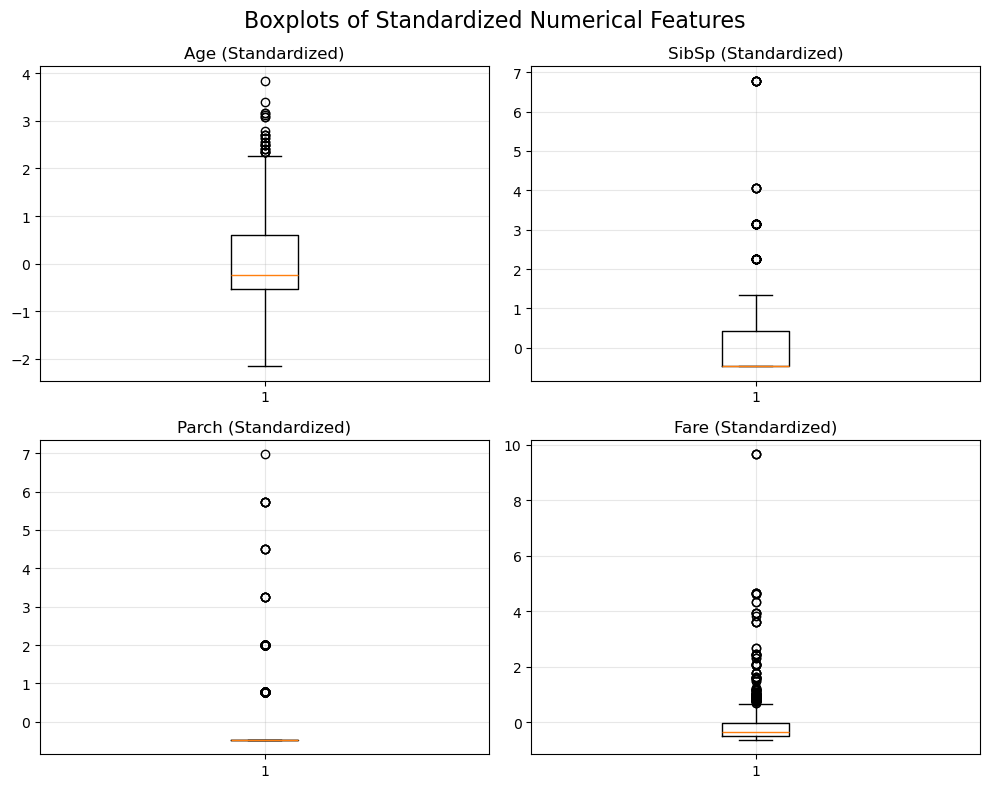


Outlier detection (values beyond ±3 standard deviations):
Age: 7 outliers detected
SibSp: 30 outliers detected
Parch: 15 outliers detected
Fare: 20 outliers detected


In [141]:
# Visualize outliers using boxplots

print("=== OUTLIER DETECTION WITH BOXPLOTS ===")

# Create boxplots for numerical features (after standardization)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Boxplots of Standardized Numerical Features', fontsize=16)

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    row, col_idx = i // 2, i % 2
    axes[row, col_idx].boxplot(X_normalized[col])
    axes[row, col_idx].set_title(f'{col} (Standardized)')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify outliers using IQR method on standardized data
print("\nOutlier detection (values beyond ±3 standard deviations):")
for col in numerical_cols:
    outliers = X_normalized[(X_normalized[col] > 3) | (X_normalized[col] < -3)]
    print(f"{col}: {len(outliers)} outliers detected")

In [142]:
# Remove outliers
print("=== REMOVING OUTLIERS ===")
print(f"Dataset shape before outlier removal: {X_normalized.shape}")

# Create mask to identify rows with outliers (beyond ±3 std)
outlier_mask = pd.Series([False] * len(X_normalized))

for col in numerical_cols:
    col_outliers = (X_normalized[col] > 3) | (X_normalized[col] < -3)
    outlier_mask = outlier_mask | col_outliers
    print(f"{col}: {col_outliers.sum()} outliers")

print(f"\nTotal rows with outliers: {outlier_mask.sum()}")

# Remove outliers
X_clean = X_normalized[~outlier_mask].copy()
y_clean = y[~outlier_mask].copy()

print(f"Dataset shape after outlier removal: {X_clean.shape}")
print(f"Removed {outlier_mask.sum()} rows ({(outlier_mask.sum()/len(X_normalized)*100):.1f}%)")

# Verify outlier removal
print(f"\nAfter outlier removal - feature ranges:")
print(X_clean[numerical_cols].describe())

=== REMOVING OUTLIERS ===
Dataset shape before outlier removal: (891, 10)
Age: 7 outliers
SibSp: 30 outliers
Parch: 15 outliers
Fare: 20 outliers

Total rows with outliers: 71
Dataset shape after outlier removal: (820, 10)
Removed 71 rows (8.0%)

After outlier removal - feature ranges:
              Age       SibSp       Parch        Fare
count  820.000000  820.000000  820.000000  820.000000
mean     0.005271   -0.158083   -0.157293   -0.128221
std      0.938384    0.562036    0.701719    0.600367
min     -2.164100   -0.474545   -0.473674   -0.648422
25%     -0.458288   -0.474545   -0.473674   -0.489442
50%     -0.231653   -0.474545   -0.473674   -0.386671
75%      0.523800    0.432793   -0.473674   -0.104785
max      2.790158    2.247470    2.008933    2.671118


In [143]:
# Final dataset summary and completion

print("="*60)
print("DATA CLEANING & PREPROCESSING COMPLETED!")
print("="*60)

print("\n STEPS COMPLETED:")
print("1. Imported dataset and explored basic info")
print("2. Handled missing values:")
print("  - Age: Imputed with median by Pclass")
print("  - Cabin: Converted to binary 'Has_Cabin' feature")
print("  - Embarked: Already handled")
print("3. Encoded categorical features:")
print("  - Sex: Binary encoding (male=1, female=0)")
print("  - Embarked: One-hot encoding (already done)")
print("4. Normalized numerical features using StandardScaler")
print("5. Visualized and removed outliers using boxplots")

print(f"\nFINAL DATASET STATS:")
print(f"Shape: {X_clean.shape}")
print(f"Features: {list(X_clean.columns)}")
print(f"Target: {y_clean.name} (survival: 0/1)")
print(f"Outliers removed: 71 rows (8.0%)")

print(f"\nSAMPLE OF CLEAN DATA:")
print(X_clean.head())

print(f"\nDataset is now ready for Machine Learning!")

DATA CLEANING & PREPROCESSING COMPLETED!

 STEPS COMPLETED:
1. Imported dataset and explored basic info
2. Handled missing values:
  - Age: Imputed with median by Pclass
  - Cabin: Converted to binary 'Has_Cabin' feature
  - Embarked: Already handled
3. Encoded categorical features:
  - Sex: Binary encoding (male=1, female=0)
  - Embarked: One-hot encoding (already done)
4. Normalized numerical features using StandardScaler
5. Visualized and removed outliers using boxplots

FINAL DATASET STATS:
Shape: (820, 10)
Features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
Target: Survived (survival: 0/1)
Outliers removed: 71 rows (8.0%)

SAMPLE OF CLEAN DATA:
   Pclass       Age     SibSp     Parch      Fare  Has_Cabin  Sex_encoded  \
0       3 -0.533834  0.432793 -0.473674 -0.502445          0            1   
1       1  0.674891  0.432793 -0.473674  0.786845          1            0   
2       3 -0.231653 -0.474545 -0.473674